In [424]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv


In [425]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('../input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv')

In [426]:
df.rename(columns={'T_STANDARD_TICKET_TYPE_NAME':'TICKET_TYPE','SEAT_REGION_NAME':'SEAT_TYPE'},inplace=True)

In [427]:
df.head(2)

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,...,SHIPPING_COUNTRY_ID1,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS
0,331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,1,10,NaN,5,61,300.0,26237,0,male,2103
1,332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,1,10,NaN,5,61,300.0,26237,0,male,2103


In [428]:
df['CREATE_DATE']

0       2010/10/14 p.m. 11:25:58.
1       2010/10/14 p.m. 11:25:58.
2        2010/9/18 p.m. 11:26:37.
3        2010/9/18 p.m. 11:26:37.
4        2010/9/18 p.m. 11:28:56.
                  ...            
7064     2010/10/9 p.m. 01:46:11.
7065     2010/10/9 p.m. 01:46:11.
7066     2010/10/9 p.m. 01:20:40.
7067     2010/10/9 p.m. 01:20:40.
7068    2010/10/13 a.m. 12:17:56.
Name: CREATE_DATE, Length: 7069, dtype: object

In [429]:
# Data Processing - convert wrong date time format to the correct one

# Replace "." with empty space in CREATE_DATE and copy data to MY_DATE
df['MY_DATE'] = df.CREATE_DATE.str.replace('.', '', regex=False)

# Apply datetime object with correct format to MY_DATE
df['MY_DATE'] = pd.to_datetime(df['MY_DATE'].str.strip(), format='%Y/%m/%d %p %I:%M:%S')

In [430]:
#我要create date時間,檢查修改好的時間格式
df['MY_DATE'] 

0      2010-10-14 23:25:58
1      2010-10-14 23:25:58
2      2010-09-18 23:26:37
3      2010-09-18 23:26:37
4      2010-09-18 23:28:56
               ...        
7064   2010-10-09 13:46:11
7065   2010-10-09 13:46:11
7066   2010-10-09 13:20:40
7067   2010-10-09 13:20:40
7068   2010-10-13 00:17:56
Name: MY_DATE, Length: 7069, dtype: datetime64[ns]

In [431]:
df.head(2)

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,...,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS,MY_DATE
0,331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,10,NaN,5,61,300.0,26237,0,male,2103,2010-10-14 23:25:58
1,332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,10,NaN,5,61,300.0,26237,0,male,2103,2010-10-14 23:25:58


In [432]:
df_s_m=df.groupby(['SEAT_TYPE','MY_DATE'])
seattype=[]
len_i_list=[]
time_series=[]
for i in df_s_m:
    #print(i) # i會印出好長一串,因此i[0]會 得到('Floor2Sectionpurple2B', Timestamp('2010-09-18 13:39:48') / 
    # 然後這是一個tuple ,i[0][0]會得到 'Floor2sectionPurple2B',i[0][1]得到Timestamp,
    #print(i[0][0],'/',i[0][1],len(i[1])) #zones & date & number of ticks sales
    seattype.append(i[0][0])
    len_i_list.append(len(i[1]))
    time_series.append(i[0][1])
#Floor2Sectionpurple2B total sale:142張票,但要看要有一個時間線

In [433]:
print(type(time_series))
#print((time_series))
#拿掉Timestamp 的字串
for timestampout in time_series:
    #timestampout.replace('Timestamp','')
    pass

<class 'list'>


In [434]:
# 抓取所有seattype
print(type(seattype))
#print(seattype) 結果是一個seattype list
#要使用count計算必須轉換成string
seattype=" ".join(str(x) for x in seattype)
print(type(seattype))

<class 'list'>
<class 'str'>


In [435]:
# Get total number of ticket for each SEAT_TYPE
count = df.groupby('SEAT_TYPE').size()
dfSeatTypeCount = count.to_frame(name='COUNTS').reset_index()
dfSeatTypeCount = dfSeatTypeCount.sort_values(by='COUNTS', ascending=True)
print(dfSeatTypeCount)
#Floor2Sectionpurple2B

                SEAT_TYPE  COUNTS
13  Floor3Sectionyellow3A      39
22  Floor3Sectionyellow3J      48
4      Floor2Sectionred2B     137
10  Floor2Sectionyellow2C     140
0   Floor2Sectionpurple2B     142
6      Floor2Sectionred2D     150
2   Floor2Sectionpurple2D     154
8   Floor2Sectionyellow2A     184
14  Floor3Sectionyellow3B     187
17  Floor3Sectionyellow3E     190
21  Floor3Sectionyellow3I     191
9   Floor2Sectionyellow2B     199
18  Floor3Sectionyellow3F     212
1   Floor2Sectionpurple2C     213
5      Floor2Sectionred2C     223
11  Floor2Sectionyellow2D     225
12  Floor2Sectionyellow2E     247
3   Floor2Sectionpurple2E     270
7      Floor2Sectionred2E     297
26   FloorB1FloorSectionD     353
25   FloorB1FloorSectionC     402
24   FloorB1FloorSectionB     404
16  Floor3Sectionyellow3D     459
20  Floor3Sectionyellow3H     486
15  Floor3Sectionyellow3C     493
23   FloorB1FloorSectionA     510
19  Floor3Sectionyellow3G     514


In [436]:
df.groupby('SEAT_TYPE').size()

SEAT_TYPE
Floor2Sectionpurple2B    142
Floor2Sectionpurple2C    213
Floor2Sectionpurple2D    154
Floor2Sectionpurple2E    270
Floor2Sectionred2B       137
Floor2Sectionred2C       223
Floor2Sectionred2D       150
Floor2Sectionred2E       297
Floor2Sectionyellow2A    184
Floor2Sectionyellow2B    199
Floor2Sectionyellow2C    140
Floor2Sectionyellow2D    225
Floor2Sectionyellow2E    247
Floor3Sectionyellow3A     39
Floor3Sectionyellow3B    187
Floor3Sectionyellow3C    493
Floor3Sectionyellow3D    459
Floor3Sectionyellow3E    190
Floor3Sectionyellow3F    212
Floor3Sectionyellow3G    514
Floor3Sectionyellow3H    486
Floor3Sectionyellow3I    191
Floor3Sectionyellow3J     48
FloorB1FloorSectionA     510
FloorB1FloorSectionB     404
FloorB1FloorSectionC     402
FloorB1FloorSectionD     353
dtype: int64

In [437]:
#各區zone出現的次數 #  seattype.count('')
print('Floor2Sectionpurple2B:',seattype.count('Floor2Sectionpurple2B'))
print('Floor2Sectionpurple2C:',seattype.count('Floor2Sectionpurple2C'))
print('Floor2Sectionpurple2D:',seattype.count('Floor2Sectionpurple2D'))
print('Floor2Sectionpurple2E:',seattype.count('Floor2Sectionpurple2E'))
print('Floor2Sectionred2B:',seattype.count('Floor2Sectionred2B'))
print('Floor2Sectionred2C:',seattype.count('Floor2Sectionred2C'))
print('Floor2Sectionred2D:',seattype.count('Floor2Sectionred2D'))
print('Floor2Sectionred2E:',seattype.count('Floor2Sectionred2E'))
print('Floor2Sectionyellow2A:',seattype.count('Floor2Sectionyellow2A'))
print('Floor2Sectionyellow2B:',seattype.count('Floor2Sectionyellow2B'))
print('Floor2Sectionyellow2C:',seattype.count('Floor2Sectionyellow2C'))
print('Floor2Sectionyellow2D:',seattype.count('Floor2Sectionyellow2D'))
print('Floor2Sectionyellow2E:',seattype.count('Floor2Sectionyellow2E'))
print('Floor3Sectionyellow3A:',seattype.count('Floor3Sectionyellow3A'))
print('Floor3Sectionyellow3B:',seattype.count('Floor3Sectionyellow3B'))
print('Floor3Sectionyellow3C:',seattype.count('Floor3Sectionyellow3C'))
print('Floor3Sectionyellow3D:',seattype.count('Floor3Sectionyellow3D'))
print('Floor3Sectionyellow3E:',seattype.count('Floor3Sectionyellow3E'))
print('Floor3Sectionyellow3F:',seattype.count('Floor3Sectionyellow3F'))
print('Floor3Sectionyellow3G:',seattype.count('Floor3Sectionyellow3G'))
print('Floor3Sectionyellow3H:',seattype.count('Floor3Sectionyellow3H'))
print('Floor3Sectionyellow3I:',seattype.count('Floor3Sectionyellow3I'))
print('Floor3Sectionyellow3J:',seattype.count('Floor3Sectionyellow3J'))
print('FloorB1FloorSectionA:',seattype.count('FloorB1FloorSectionA'))
print('FloorB1FloorSectionB:',seattype.count('FloorB1FloorSectionB'))
print('FloorB1FloorSectionC:',seattype.count('FloorB1FloorSectionC'))
print('FloorB1FloorSectionD:',seattype.count('FloorB1FloorSectionD'))

Floor2Sectionpurple2B: 69
Floor2Sectionpurple2C: 94
Floor2Sectionpurple2D: 67
Floor2Sectionpurple2E: 122
Floor2Sectionred2B: 67
Floor2Sectionred2C: 101
Floor2Sectionred2D: 81
Floor2Sectionred2E: 144
Floor2Sectionyellow2A: 87
Floor2Sectionyellow2B: 100
Floor2Sectionyellow2C: 66
Floor2Sectionyellow2D: 106
Floor2Sectionyellow2E: 116
Floor3Sectionyellow3A: 19
Floor3Sectionyellow3B: 96
Floor3Sectionyellow3C: 210
Floor3Sectionyellow3D: 199
Floor3Sectionyellow3E: 79
Floor3Sectionyellow3F: 97
Floor3Sectionyellow3G: 241
Floor3Sectionyellow3H: 218
Floor3Sectionyellow3I: 91
Floor3Sectionyellow3J: 21
FloorB1FloorSectionA: 259
FloorB1FloorSectionB: 219
FloorB1FloorSectionC: 182
FloorB1FloorSectionD: 168


In [438]:
#print(len_i_list)
#print(len(len_i_list))

## Floor2Sectionpurple2[B,C,D,E]
Floor2Sectionpurple2B: 69  
Floor2Sectionpurple2C: 94  
Floor2Sectionpurple2D: 67  
Floor2Sectionpurple2E: 122  

In [439]:
#Floor2Sectionpurple2B 票數銷售時間狀況
Floor2Sectionpurple2B_time_series=(len_i_list[:69]) # Floor2Sectionpurple2B_time_series,隨著時間線,票數銷售的情況
print(type(Floor2Sectionpurple2B_time_series))
print(Floor2Sectionpurple2B_time_series)
#Floor2Sectionpurple2C 票數銷售時間狀況
Floor2Sectionpurple2C_time_series=(len_i_list[70:164])
#Floor2Sectionpurple2D 票數銷售時間狀況
Floor2Sectionpurple2D_time_series=(len_i_list[165:232])
#Floor2Sectionpurple2E 票數銷售時間狀況
Floor2Sectionpurple2E_time_series=(len_i_list[233:355])

total=0
for num in Floor2Sectionpurple2B_time_series:
    total+=num
print(total)

<class 'list'>
[3, 2, 3, 2, 3, 2, 2, 4, 4, 2, 2, 4, 4, 1, 1, 1, 2, 1, 2, 3, 4, 2, 4, 1, 1, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 3, 5, 2, 2, 2, 2, 2, 1, 1, 1]
142


In [440]:
list1=[1,2,3,4,5,6,7]
list1[:3]

[1, 2, 3]

In [441]:
y0=np.array(Floor2Sectionpurple2B_time_series) 
y1=np.array(Floor2Sectionpurple2C_time_series)
y2=np.array(Floor2Sectionpurple2D_time_series)
y3=np.array(Floor2Sectionpurple2E_time_series)

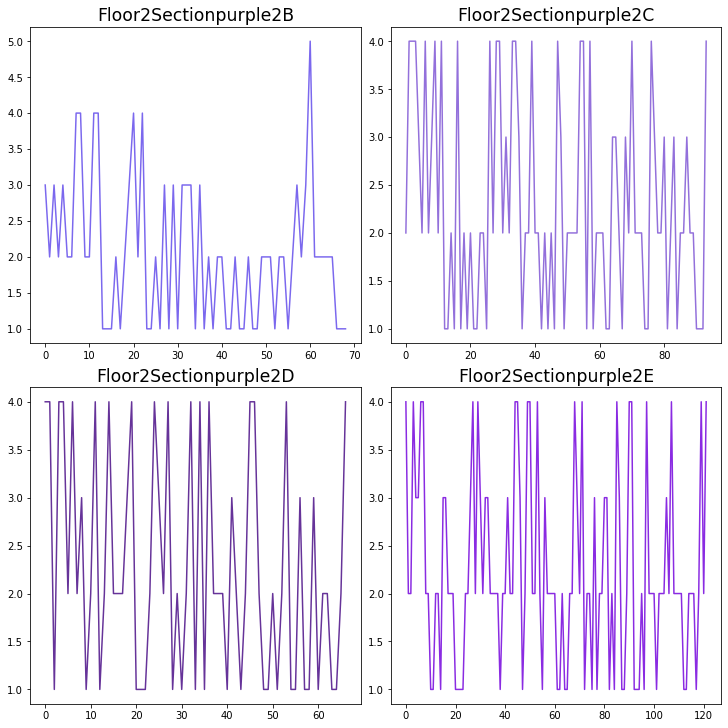

In [442]:
fig, ax = plt.subplots(2,2,constrained_layout = True,figsize=(10,10))
ax[0,0].set_title('Floor2Sectionpurple2B',fontsize='xx-large')
ax[0,0].plot(y0,c='mediumslateblue')
ax[0,1].set_title('Floor2Sectionpurple2C',fontsize='xx-large')
ax[0,1].plot(y1,c='mediumpurple')
ax[1,0].set_title('Floor2Sectionpurple2D',fontsize='xx-large')
ax[1,0].plot(y2,c='rebeccapurple')
ax[1,1].set_title('Floor2Sectionpurple2E',fontsize='xx-large')
ax[1,1].plot(y3,c='blueviolet')

## Floor2Sectionred2[B,C,D,E]  
Floor2Sectionred2B: 67  
Floor2Sectionred2C: 101  
Floor2Sectionred2D: 81  
Floor2Sectionred2E: 144

In [443]:
Floor2Sectionred2B_time_series=(len_i_list[356:423])
Floor2Sectionred2C_time_series=(len_i_list[424:525])
Floor2Sectionred2D_time_series=(len_i_list[526:606])
Floor2Sectionred2E_time_series=(len_i_list[607:750])

In [444]:
y0=np.array(Floor2Sectionred2B_time_series)
y1=np.array(Floor2Sectionred2C_time_series)
y2=np.array(Floor2Sectionred2D_time_series)
y3=np.array(Floor2Sectionred2E_time_series)

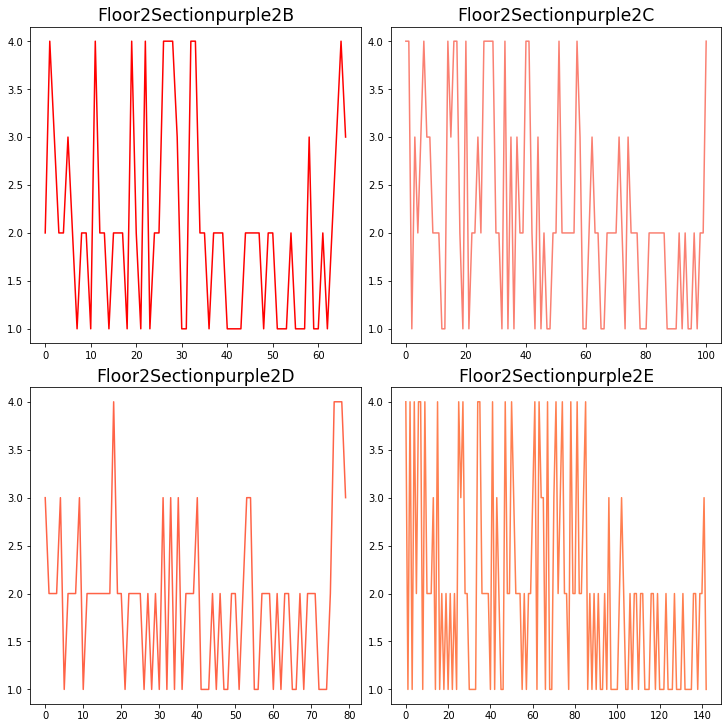

In [445]:
fig, ax = plt.subplots(2,2,constrained_layout = True,figsize=(10,10))
ax[0,0].set_title('Floor2Sectionpurple2B',fontsize='xx-large')
ax[0,0].plot(y0,c='red')
ax[0,1].set_title('Floor2Sectionpurple2C',fontsize='xx-large')
ax[0,1].plot(y1,c='salmon')
ax[1,0].set_title('Floor2Sectionpurple2D',fontsize='xx-large')
ax[1,0].plot(y2,c='tomato')
ax[1,1].set_title('Floor2Sectionpurple2E',fontsize='xx-large')
ax[1,1].plot(y3,c='coral')

## Floor2Sectionyellow2[A~E]  
Floor2Sectionyellow2A: 87  
Floor2Sectionyellow2B: 100  
Floor2Sectionyellow2C: 66  
Floor2Sectionyellow2D: 106  
Floor2Sectionyellow2E: 116  

In [448]:
Floor2Sectionyellow2A_time_series=(len_i_list[751:838])
Floor2Sectionyellow2B_time_series=(len_i_list[839:939])
Floor2Sectionyellow2C_time_series=(len_i_list[940:1006])
Floor2Sectionyellow2D_time_series=(len_i_list[1007:1113])
Floor2Sectionyellow2E_time_series=(len_i_list[1114:1230])

In [ ]:
y0=np.array(Floor2Sectionyellow2A_time_series)
y1=np.array(Floor2Sectionyellow2B_time_series)
y2=np.array(Floor2Sectionyellow2C_time_series)
y3=np.array(Floor2Sectionyellow2D_time_series)
y5=np.array(Floor2Sectionyellow2E_time_series)

In [ ]:
fig, ax = plt.subplots(2,3,constrained_layout = True,figsize=(10,10))
ax[0,0].set_title('Floor2Sectionpurple2B',fontsize='xx-large')
ax[0,0].plot(y0,c='red')
ax[0,1].set_title('Floor2Sectionpurple2C',fontsize='xx-large')
ax[0,1].plot(y1,c='salmon')
ax[1,0].set_title('Floor2Sectionpurple2D',fontsize='xx-large')
ax[1,0].plot(y2,c='tomato')
ax[1,1].set_title('Floor2Sectionpurple2E',fontsize='xx-large')
ax[1,1].plot(y3,c='coral')
ax[]

## Floor3Sectionyellow3[A~J]
Floor3Sectionyellow3A: 19  
Floor3Sectionyellow3B: 96  
Floor3Sectionyellow3C: 210  
Floor3Sectionyellow3D: 199  
Floor3Sectionyellow3E: 79  
Floor3Sectionyellow3F: 97  
Floor3Sectionyellow3G: 241  
Floor3Sectionyellow3H: 218  
Floor3Sectionyellow3I: 91  
Floor3Sectionyellow3J: 21  

In [447]:
Floor2Sectionyellow3A_time_series=(len_i_list[1231:1250])
Floor2Sectionyellow3B_time_series=(len_i_list[1251:1347])
Floor2Sectionyellow3C_time_series=(len_i_list[1348:1558])
Floor2Sectionyellow3D_time_series=(len_i_list[1559:1758])
Floor2Sectionyellow3E_time_series=(len_i_list[1759:1838])
Floor2Sectionyellow3F_time_series=(len_i_list[1839:1936])
Floor2Sectionyellow3G_time_series=(len_i_list[1937:2178])
Floor2Sectionyellow3H_time_series=(len_i_list[2179:2397])
Floor2Sectionyellow3I_time_series=(len_i_list[2398:2489])
Floor2Sectionyellow3J_time_series=(len_i_list[2490:2511])

In [ ]:
fig, ax = plt.subplots(2,2,constrained_layout = True,figsize=(10,10))
ax[0,0].set_title('Floor2Sectionpurple2B',fontsize='xx-large')
ax[0,0].plot(y0,c='red')
ax[0,1].set_title('Floor2Sectionpurple2C',fontsize='xx-large')
ax[0,1].plot(y1,c='salmon')
ax[1,0].set_title('Floor2Sectionpurple2D',fontsize='xx-large')
ax[1,0].plot(y2,c='tomato')
ax[1,1].set_title('Floor2Sectionpurple2E',fontsize='xx-large')
ax[1,1].plot(y3,c='coral')